## **Index**
    
    1.Seasonal Adjustment through Differencing
    
    2.SARIMA
    
    3.Grid Search for SARIMA models
    
    4.SARIMAX

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
#!pip3 install pyramid-arima
import pmdarima as pm
from matplotlib import pyplot
from numpy import polyfit

**Seasonal Adjustment through Differencing**

In [2]:
series = pd.read_excel("datasets/daily_minimum_temperatures.xlsx"
                     ,parse_dates = ['Date'], index_col = 'Date')

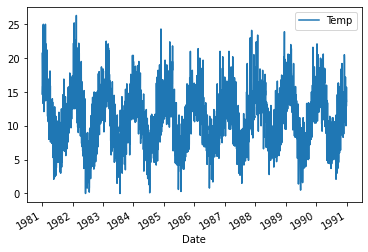

In [3]:
#dataset has seasonal component
series.plot()
pyplot.show()

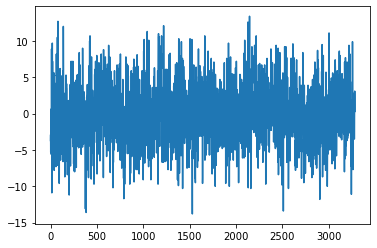

In [4]:
#removing seasonal component by differencing
X = series.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
    value = X[i] - X[i - days_in_year]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()

**SARIMA**

In [5]:
data = pd.read_excel("datasets/drugsales.xlsx"
                     ,parse_dates = ['date'], index_col = 'date')

In [6]:
data.head()

,Sales
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


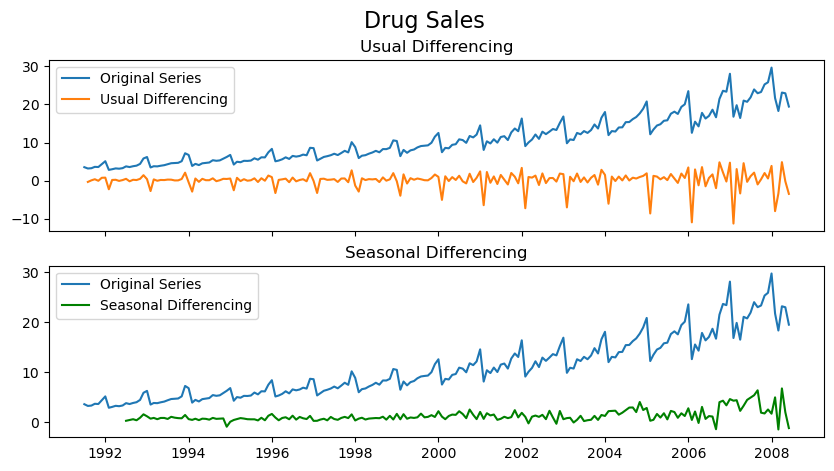

In [7]:
#plot initialize
fig,axis = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)
# Usual Differencing
axis[0].plot(data[:], label='Original Series')
axis[0].plot(data[:].diff(1), label='Usual Differencing')
axis[0].set_title('Usual Differencing')
axis[0].legend(loc='upper left', fontsize=10)

# Seasinal Dei
axis[1].plot(data[:], label='Original Series')
axis[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axis[1].set_title('Seasonal Differencing')
axis[1].legend(loc='upper left', fontsize=10)
plt.suptitle('Drug Sales', fontsize=16)
plt.show()

In [ ]:
#Seasonal spikes are intact for usual differencing and removed by seasonal differencing

In [8]:


# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=534.818, Time=1.50 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=624.061, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=596.068, Time=0.58 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=611.475, Time=0.37 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=757.274, Time=0.03 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=559.407, Time=0.36 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=2.63 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=536.817, Time=3.18 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=543.106, Time=1.47 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=537.489, Time=4.69 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=594.467, Time=0.36 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=529.829, Time=1.38 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=555.198, Time=0.42 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=3.70 sec
 ARIMA(2,0,1)(0,1,2)[12] intercept   : AI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  204
Model:             SARIMAX(1, 0, 2)x(1, 1, 2, 12)   Log Likelihood                -253.954
Date:                            Fri, 28 Jan 2022   AIC                            523.908
Time:                                    16:56:44   BIC                            549.968
Sample:                                         0   HQIC                           534.462
                                            - 204                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0052      0.009      0.580      0.562      -0.012       0.023
ar.L1          0.9766      0.018     52.794      0.000       0.940       1.013
ma.L1         -0.9115      0.057    -16.131      0.000      -1.022      -0.801
ma.L2          0.2168      0.059      3.684      0.000       0.101       0.332
ar.S.L12       0.8433      0.154      5.459      0.000       0.541       1.146
ma.S.L12      -1.5865      0.176     -9.012      0.000      -1.932      -1.241
ma.S.L24       0.7689      0.111      6.908      0.000       0.551       0.987
sigma2         0.7474      0.066     11.300      0.000       0.618       0.877
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):               142.53
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):              14.49   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

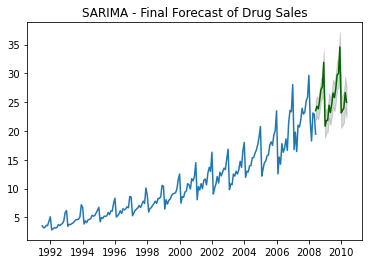

In [9]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Drug Sales")
plt.show()

**Grid Search Framework for SARIMA**

In [10]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error 
from math import sqrt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline 
np.set_printoptions(threshold=np.inf)
pd.set_option('display.max_rows', 9999)
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed

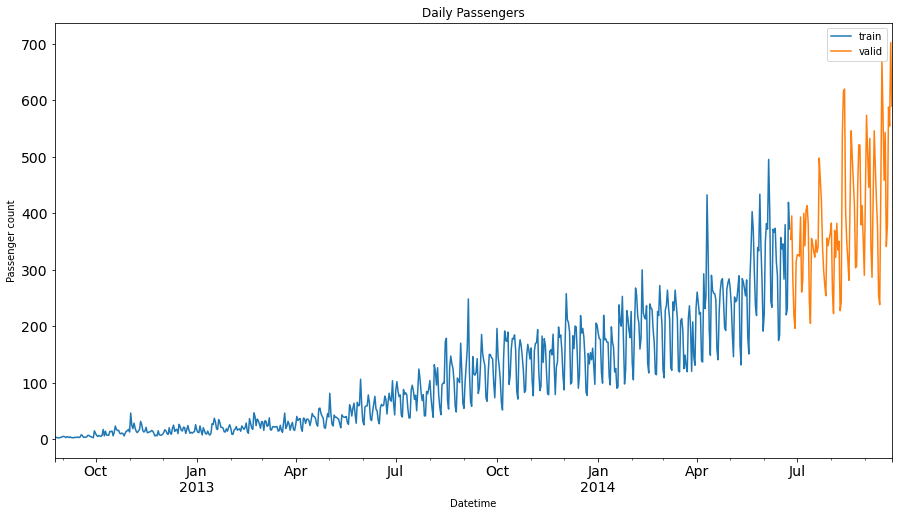

In [11]:
df_train_orig=pd.read_csv('datasets/Train_data.csv')
df_test_orig=pd.read_csv('datasets/Test_data.csv')
train=df_train_orig.copy()
test=df_test_orig.copy()
df_train_orig.Datetime = pd.to_datetime(df_train_orig.Datetime, format='%d-%m-%Y %H:%M')
df_test_orig.Datetime = pd.to_datetime(df_test_orig.Datetime, format='%d-%m-%Y %H:%M')
train.Datetime = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
test.Datetime = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
for i in (df_train_orig, df_test_orig, train, test):
  i['year']=i.Datetime.dt.year 
  i['month']=i.Datetime.dt.month 
  i['day']=i.Datetime.dt.day
  i['hour']=i.Datetime.dt.hour
  i['weekday']=i.Datetime.dt.weekday
  i.index=i.Datetime
  i.drop('ID', axis=1, inplace=True)
	
train_valid_daily = train.resample('D').mean()

valid=train_valid_daily.loc['2014-06-25':'2014-09-25']
train=train_valid_daily.loc['2012-08-25':'2014-06-24']

train.Count.plot(figsize=(15,8), title= 'Daily Passengers', fontsize=14, label='train') 
valid.Count.plot(figsize=(15,8), title= 'Daily Passengers', fontsize=14, label='valid') 
plt.xlabel("Datetime") 
plt.ylabel("Passenger count") 
plt.legend(loc='best') 
plt.show()

def rmse(validCount, predCount):
  return sqrt(mean_squared_error(validCount, predCount)) 

In [12]:
def evaluate_sarima_model(train, test, arima_order, seasonalOrder):
    try:
        # no need to calcuate if order as well as seasonal differencing is 0
        if (arima_order[1]+seasonalOrder[1])==0:
          print(f"##### Skipped modelling with: {arima_order}, {seasonalOrder} --> Both d & D are zeroes\n")
          # return a high value of RMSE so that it sits at the bottom of the list when sorted
          return 999999999, arima_order, seasonalOrder
          
        y_hat = test.copy() 
        model = SARIMAX(train.Count, order=arima_order, seasonal_order=seasonalOrder)
        model_fit = model.fit()
        predict = model_fit.predict(start="2014-6-25", end="2014-9-25", dynamic=True)
        y_hat['model_prediction']=predict

        error = rmse(test.Count, y_hat.model_prediction)
        print(f"> Model: {error}, {arima_order}, {seasonalOrder}\n")
        return error, arima_order, seasonalOrder
    except Exception as e:
        # in case of convergence errors, non-invertible errors, etc.
        print(f"##### Skipped modelling with: {arima_order}, {seasonalOrder}\n")
        print(e)
        return 999999999, arima_order, seasonalOrder

def evaluate_models_parallely(train, test, p_values, d_values, q_values, P_values, D_values, Q_values, m_values):
    # utilize aall available cores using n_jobs = cpu_count()
    executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing') 

    scor = []
    try:
      # call our function in a parallel manner
      tasks = (delayed(evaluate_sarima_model)(train, test, (p,d,q), (P,D,Q,m)) for m in m_values for Q in Q_values for D in D_values for P in P_values for q in q_values for d in d_values for p in p_values)  
      results = executor(tasks)

      scor.append(results)
    except Exception as e:
      print('Fatal Error....')
      print(e)

    return scor

In [ ]:
# specify the range of values we want ot try for the different hyperprameters
p_values = np.arange(0, 2)
d_values = np.arange(1, 2)
q_values = np.arange(1, 4)
P_values = np.arange(0, 2)
D_values = np.arange(1, 2)
Q_values = np.arange(0, 3)
m_values = np.arange(7, 8)

# total combinations being tried: 2*1*3*2*1*3*1 = 36

scor=evaluate_models_parallely(train, valid, p_values, d_values, q_values, P_values, D_values, Q_values, m_values)

scores=[]
for tup_list in scor:
    for tup in tup_list:
        scores.append(tup)

# sort the results on basis of RMSE scores (ascending)
scores.sort(key=lambda x: x[0])

print('\nTop 5 SARIMA params with minimum RMSEs:\n')
for x in scores[:5]:
  print(f'RMSE={x[0]}  order={x[1]}  seasonal_order={x[2]}\n')

print("DONE!")

**SARIMAX**

In [13]:
# multiplicative seasonal component
result_mul = seasonal_decompose(data['Sales'][-36:],   # 3 years
                                model='multiplicative', 
                                extrapolate_trend='freq')

seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

# merge with the base data
data['month'] = data.index.month
df = pd.merge(data, seasonal_index, how='left', on='month')
df.columns = ['Sales', 'month', 'seasonal_index']
df.index = data.index  # reassign the index.

In [14]:
# SARIMAX Model
sxmodel = pm.auto_arima(df[['Sales']], exogenous=df[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=536.818, Time=1.72 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=626.061, Time=0.08 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=598.068, Time=0.64 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=613.475, Time=0.48 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=759.274, Time=0.16 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=561.407, Time=0.42 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=2.68 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=538.817, Time=4.16 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=545.106, Time=1.69 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=540.012, Time=5.60 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=596.467, Time=0.45 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=531.829, Time=1.76 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=557.198, Time=0.49 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=3.12 sec
 ARIMA(2,0,1)(0,1,2)[12] intercept   : AI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  204
Model:             SARIMAX(1, 0, 2)x(1, 1, 2, 12)   Log Likelihood                -253.992
Date:                            Fri, 28 Jan 2022   AIC                            525.984
Time:                                    16:58:51   BIC                            555.302
Sample:                                07-01-1991   HQIC                           537.858
                                     - 06-01-2008                                         
Covariance Type:                              opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept          0.0050      0.009      0.565      0.572      -0.012       0.022
seasonal_index  1.013e-06   3403.652   2.98e-10      1.000   -6671.035    6671.035
ar.L1              0.9768      0.018     53.780      0.000       0.941       1.012
ma.L1             -0.9059      0.057    -15.987      0.000      -1.017      -0.795
ma.L2              0.2047      0.059      3.467      0.001       0.089       0.320
ar.S.L12           0.8455      0.166      5.092      0.000       0.520       1.171
ma.S.L12          -1.5810      0.188     -8.403      0.000      -1.950      -1.212
ma.S.L24           0.7556      0.115      6.550      0.000       0.529       0.982
sigma2             0.7526      0.065     11.586      0.000       0.625       0.880
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):               139.83
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):              14.56   Skew:                             0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

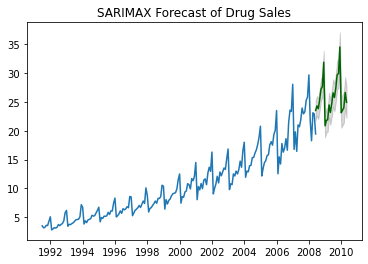

In [15]:
# Forecast
n_periods = 24
fitted, confint = sxmodel.predict(n_periods=n_periods, 
                                  exogenous=np.tile(seasonal_index.seasonal, 2).reshape(-1,1), 
                                  return_conf_int=True)

index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data['Sales'])
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMAX Forecast of Drug Sales")
plt.show()